In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)


32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [85]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [86]:
X.shape, X.dtype, Y.shape, Y.dtype


(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [87]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [88]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [89]:
C = torch.randn((27,2))

In [90]:
C

tensor([[-1.2961,  0.2759],
        [-0.2438,  0.5232],
        [ 0.6465,  1.1424],
        [-1.3482,  1.7921],
        [ 0.1694,  0.5904],
        [-0.3977,  1.2192],
        [-1.3320, -0.8968],
        [ 0.5888,  0.7597],
        [-0.0695, -0.5814],
        [-0.3506,  0.8526],
        [ 0.4803,  0.1447],
        [ 0.5760,  2.3082],
        [-1.0078,  1.1102],
        [ 2.2307, -1.7671],
        [-0.5984,  0.4117],
        [ 0.7621,  1.0135],
        [-1.4411,  0.2803],
        [-0.1571,  0.9994],
        [-0.2894,  0.4924],
        [-1.0766,  0.4884],
        [-1.4553, -2.1415],
        [ 0.4694,  0.5512],
        [-1.9124, -0.8995],
        [-0.5319, -0.3776],
        [-0.1916, -0.0166],
        [ 1.8560, -1.0204],
        [-0.6607,  1.3628]])

In [91]:
C[5]

tensor([-0.3977,  1.2192])

In [92]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [93]:
F.one_hot(torch.tensor(5), num_classes=27).shape

torch.Size([27])

In [94]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.3977,  1.2192])

In [95]:
torch.tensor([5,6,7,7,7,7])

tensor([5, 6, 7, 7, 7, 7])

In [96]:
C[torch.tensor([5,6,7,7,7,7])]

tensor([[-0.3977,  1.2192],
        [-1.3320, -0.8968],
        [ 0.5888,  0.7597],
        [ 0.5888,  0.7597],
        [ 0.5888,  0.7597],
        [ 0.5888,  0.7597]])

In [97]:
X.shape

torch.Size([228146, 3])

In [98]:
C[X].shape

torch.Size([228146, 3, 2])

In [99]:
C[X]

tensor([[[-1.2961,  0.2759],
         [-1.2961,  0.2759],
         [-1.2961,  0.2759]],

        [[-1.2961,  0.2759],
         [-1.2961,  0.2759],
         [-0.3977,  1.2192]],

        [[-1.2961,  0.2759],
         [-0.3977,  1.2192],
         [ 2.2307, -1.7671]],

        ...,

        [[-0.6607,  1.3628],
         [-0.6607,  1.3628],
         [ 1.8560, -1.0204]],

        [[-0.6607,  1.3628],
         [ 1.8560, -1.0204],
         [-0.6607,  1.3628]],

        [[ 1.8560, -1.0204],
         [-0.6607,  1.3628],
         [-0.1916, -0.0166]]])

In [100]:
X[13,2]

tensor(1)

In [101]:
C[X][13,2]

tensor([-0.2438,  0.5232])

In [102]:
C[1]

tensor([-0.2438,  0.5232])

In [103]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [104]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [105]:
emb[:,0, :]

tensor([[-1.2961,  0.2759],
        [-1.2961,  0.2759],
        [-1.2961,  0.2759],
        ...,
        [-0.6607,  1.3628],
        [-0.6607,  1.3628],
        [ 1.8560, -1.0204]])

In [106]:
emb[:,0, :].shape

torch.Size([228146, 2])

In [107]:
emb[:,1,:].shape

torch.Size([228146, 2])

In [108]:
torch.cat([emb[:,0, :], emb[:,1, :], emb[:,2, :]],1).shape

torch.Size([228146, 6])

In [109]:
torch.cat(torch.unbind(emb, 1),1)

tensor([[-1.2961,  0.2759, -1.2961,  0.2759, -1.2961,  0.2759],
        [-1.2961,  0.2759, -1.2961,  0.2759, -0.3977,  1.2192],
        [-1.2961,  0.2759, -0.3977,  1.2192,  2.2307, -1.7671],
        ...,
        [-0.6607,  1.3628, -0.6607,  1.3628,  1.8560, -1.0204],
        [-0.6607,  1.3628,  1.8560, -1.0204, -0.6607,  1.3628],
        [ 1.8560, -1.0204, -0.6607,  1.3628, -0.1916, -0.0166]])

In [110]:
a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [111]:
a.shape

torch.Size([18])

In [112]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [113]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [114]:
emb.shape

torch.Size([228146, 3, 2])

In [115]:
# emb.view(32,6)

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [116]:
# emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

In [117]:
h = emb.view(emb.shape[0], 6) @ W1 + b1

In [118]:
h = emb.view(-1, 6) @ W1 + b1

In [119]:
h


tensor([[ 1.1958,  1.3905,  3.2319,  ..., -5.5729,  1.5110, -2.1996],
        [ 1.5176,  1.4197,  0.4465,  ..., -2.5259,  2.2673, -6.6971],
        [ 0.7135,  7.9218, -5.9754,  ..., -1.0736,  4.3335, -0.9892],
        ...,
        [-0.4066,  7.9507, -4.8570,  ...,  0.5560,  3.4159, -2.1249],
        [ 2.7874, -5.3235,  1.5275,  ..., -0.9604,  2.3732, -2.0454],
        [ 1.2764,  3.6835, -2.4110,  ..., -1.7390, -2.5839, -1.6215]])

In [120]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)


In [121]:
h.shape

torch.Size([228146, 100])

In [122]:
b1.shape

torch.Size([100])

In [123]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [124]:
logits = h @ W2 + b2


In [125]:
logits.shape

torch.Size([228146, 27])

In [126]:
logits.shape


torch.Size([228146, 27])

In [127]:
counts = logits.exp()


In [128]:
prob = counts / counts.sum(1, keepdims=True)


In [129]:
prob.shape


torch.Size([228146, 27])

In [130]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [131]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [133]:
# prob[torch.arange(32), Y]

In [134]:
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [54]:
# ------------ now made respectable :) ---------------


In [137]:
X.shape, Y.shape # dataset


(torch.Size([228146, 3]), torch.Size([228146]))

In [138]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [139]:
sum(p.nelement() for p in parameters) # number of parameters in total


3481

In [140]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
counts = logits.exp()
prob = counts / counts.sum (1, keepdims=True)
loss = -prob[torch.arange (32), Y]. log(). mean ()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [141]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum (1, keepdims=True)
# loss = -prob[torch.arange (32), Y]. log(). mean ()
F.cross_entropy(logits, Y)
# loss

tensor(19.5052)

In [142]:
logits = torch. tensor ([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [143]:
logits = torch. tensor ([-5, -3, 0, 100])
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([0., 0., 0., nan])

In [144]:
logits = torch. tensor ([-5, -3, 0, 100]) -100 
counts = logits.exp()
probs = counts / counts. sum ()

probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [145]:
for p in parameters:
    p.requires_grad = True

In [146]:
for _ in range(10):
    #forward pass
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # print(loss.items())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad



19.505229949951172
17.08449363708496
15.776531219482422
14.833338737487793
14.002596855163574
13.253254890441895
12.579914093017578
11.983097076416016
11.470491409301758
11.051855087280273


In [147]:
torch.randint(0, 5, (32,))

tensor([0, 2, 2, 4, 0, 3, 0, 3, 4, 0, 0, 1, 3, 1, 2, 3, 0, 4, 2, 1, 1, 4, 4, 4,
        4, 3, 3, 4, 0, 2, 1, 4])

In [149]:
torch.randint(0, X.shape[0], (32,))

tensor([ 55838, 107928, 102969,  29764, 157361, 128909,  43636, 226448,  23408,
         96364, 149123, 175682, 220486, 139689, 138151,  88085, 196500,  19313,
        172442, 190220, 210148, 148847,  58245, 200702,  39856,  22052, 206775,
        139364, 155406, 193176, 225776, 166088])

In [154]:
for _ in range(10):
    #forward pass
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # print(loss.items())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad
    print(loss.item())


5.001586437225342
5.533463954925537
4.90230131149292
5.620084285736084
4.516242504119873
6.080286502838135
4.17396879196167
4.147252082824707
4.5611371994018555
5.080127716064453


In [157]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(4.7877, grad_fn=<NllLossBackward0>)

In [211]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [212]:
for p in parameters:
    p.requires_grad = True

In [193]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [204]:
lri = []
lossi = []
for i in range(10000):
    #forward pass
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    # lossi.append(loss.item())
# print(loss.item())

In [205]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3082, grad_fn=<NllLossBackward0>)

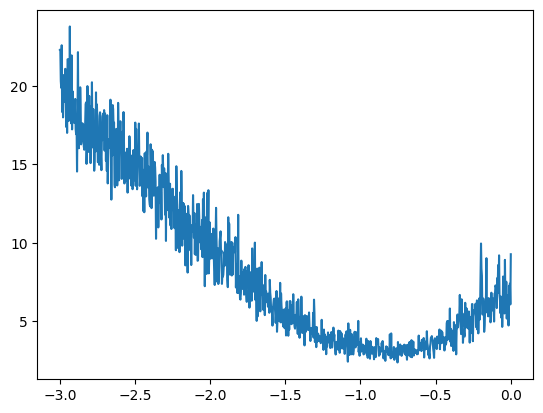

In [190]:
plt.plot(lri, lossi)

In [216]:
# build the dataset
def build_dataset (words) :
    block_size = 3 # context length: how many characters do we take to predict the next one?
    X, Y= [],[]
    for w in words:
        #print (w)
        context = [0] * block_size
        for ch in w+ '.':
            ix = stoi[ch]
            X. append (context)
            Y. append (ix)
            # print(''.join(itos(i] for i in context), '=>' , itos[ix]))
            context = context[1:] + [ix] # crop and append
    X = torch. tensor (X)
    Y = torch. tensor (Y)
    print (X.shape, Y.shape)
    return X, Y
    
import random 
random. seed (42)
random. shuffle(words)
n1 = int (0.8*len(words) )
n2 = int (0.9*len(words) )
Xtr, Ytr = build_dataset (words [:n1])
Xdev, Ydev = build_dataset(words [n1:n2] )
Xte, Yte = build_dataset (words [n2:] )

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [210]:
Xtr.shape, Ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [262]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [263]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [264]:
for p in parameters:
    p.requires_grad = True

In [265]:
lri = []
lossi = []
stepi = []

In [290]:

for i in range(50000):
    #forward pass
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
# print(loss.item())

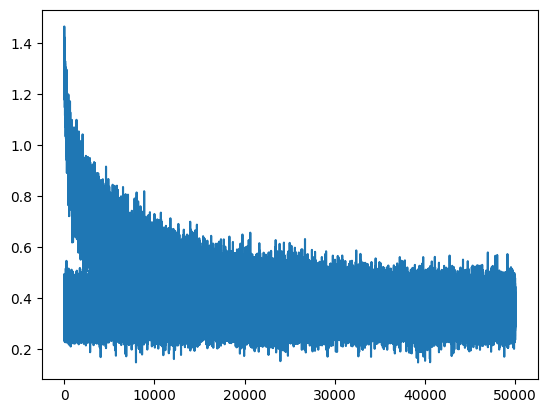

In [291]:
plt.plot(stepi, lossi)

In [292]:
print(loss.item())

2.0580852031707764


In [293]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2338, grad_fn=<NllLossBackward0>)

In [294]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2697, grad_fn=<NllLossBackward0>)

In [225]:
emb.shape

torch.Size([22781, 3, 2])

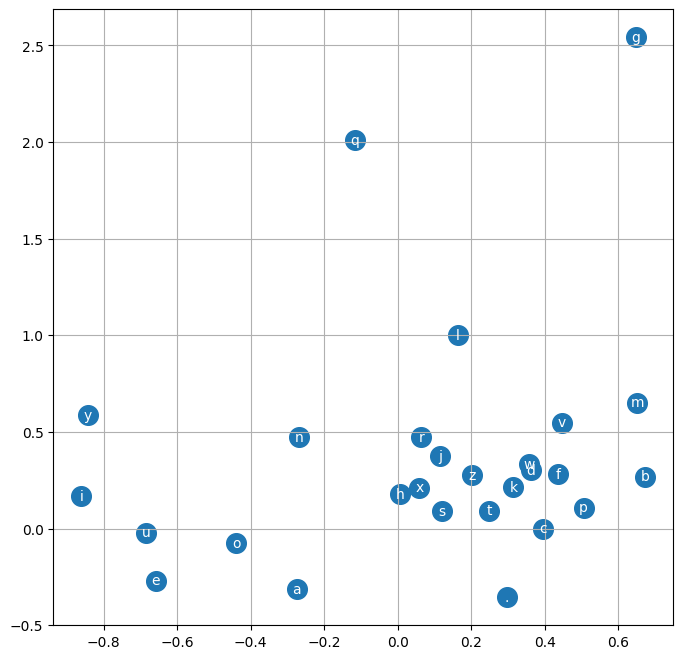

In [260]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [295]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
aar.
hari.
kimli.
rem.
cassley.
kena.
hube.
delly.
chareei.
nerenia.
chaiif.
kaleigh.
ham.
joli.
quint.
sroelea.
jamique.
jeron.
jarynix.
